In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults() # restore default settings
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "font.size": plt.rcParams["font.size"] * 1.5,
    "lines.linewidth": 3,

})
import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
plt.rc('text.latex', preamble=r'\usepackage{bm}')

## Q1 (c)(i)

In [2]:
def DE_f(t,y,epsilon = 0.03):
    return y**2. * (1.-epsilon*y)

In [3]:
def integrate(integrator,f, t0, tf, y0, h, **kwargs):
    t = np.arange(t0, tf, h)
    y = np.zeros((len(t), len(y0)))
    y[0,:] = np.array(y0)
    for i in range(1, len(t)):
        y[i,:] = integrator(f,t[i-1], y[i-1,:], h, **kwargs)
    return t, y
def euler(f, t, y, h, **kwargs):
    return y + h * f(t, y)
def FPI(f,y, tol = 1e-6,max_iter = 50):
    """
    Fixed-point iteration.
    """
    i =0
    while np.linalg.norm(f(y)-y,2) > tol and i < max_iter:
        y = f(y) 
        i+=1
    return y
def trapezoidal(f,tn,yn,h,**kwargs):
    tol = kwargs.get('tol', 1e-6)
    G = lambda y:  yn + h/2. * (f(tn,yn) + f(tn+h, y)) 
    return FPI(G,yn,tol=tol)

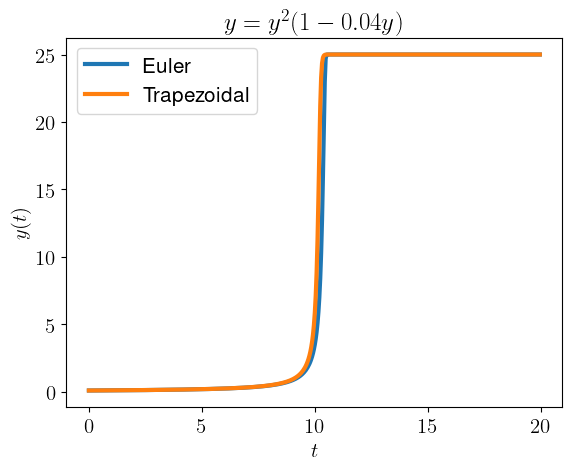

In [4]:
T = 20
y0 = [0.1]
epsilon = 0.04
N = 500
h = T/N
int_f = lambda t,y: DE_f(t,y,epsilon=epsilon)
tEuler, yEuler = integrate(euler,int_f , 0, T, y0, h)
tTrap, yTrap = integrate(trapezoidal, int_f, 0, T, y0, h, tol=1e-6)
plt.plot(tEuler, yEuler, label='Euler', color='C0')
plt.plot(tTrap, yTrap, label='Trapezoidal', color='C1')
plt.xlabel(r'$t$')
plt.ylabel(r'$y(t)$')
plt.legend()
plt.title(rf'$y = y^2(1-{epsilon}y)$')
plt.show()

## Q 3 (c)

In [5]:
def DE_f2(t,y):
    return np.array([y[1],-np.sin(y[0])])
def H(theta,p):
    return 0.5 * p**2 + (1-np.cos(theta))

In [6]:
def improved_euler(f,tn,yn,h,**kwargs):
    """
    Improved Euler method.
    """
    k1 = f(tn,yn)
    k2 = f(tn+h,yn + h*k1)
    return yn + h/2. * (k1 + k2)

def implicit_midpoint(f,tn,yn,h,**kwargs):
    """
    Implicit midpoint method.
    """
    G = lambda y: yn + h * f(tn+h/2.,(y+yn)/2.)
    return FPI(G,yn,tol=1e-6)

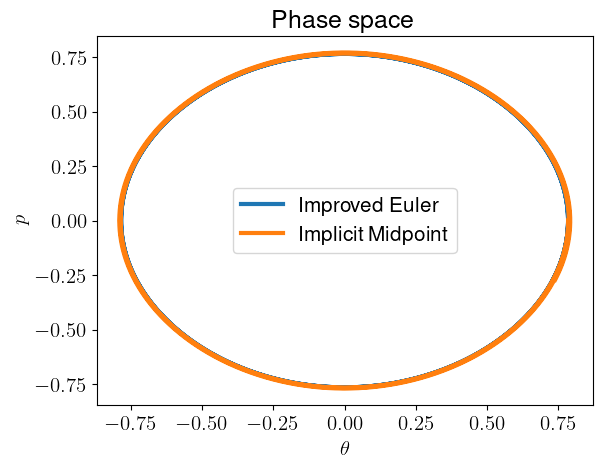

In [7]:
y0 = np.array([np.pi/4.,0.]) 
T = 20
h = 0.001

tImprovedEuler, yImprovedEuler = integrate(improved_euler, DE_f2, 0, T, y0, h)
tImplicitMidpoint, yImplicitMidpoint = integrate(implicit_midpoint, DE_f2, 0, T, y0, h)
plt.plot(yImprovedEuler[:,0],yImprovedEuler[:,1], label='Improved Euler', color='C0')
plt.plot(yImplicitMidpoint[:,0],yImplicitMidpoint[:,1], label='Implicit Midpoint', color='C1')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p$')
plt.title(r'Phase space')
plt.legend()
plt.show()

### Energy Error

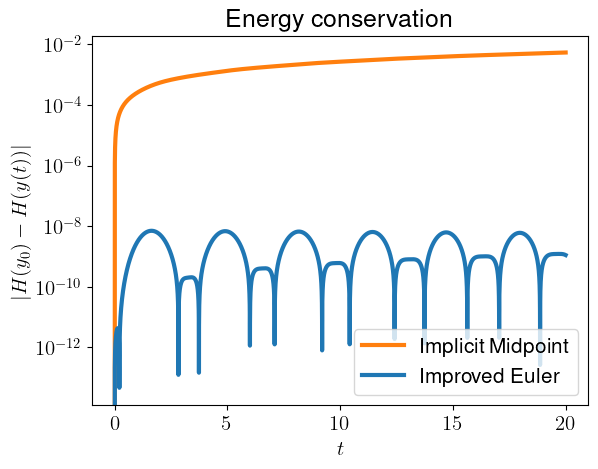

In [8]:
plt.semilogy(tImplicitMidpoint, np.abs(H(y0[0],y0[1]) - H(yImplicitMidpoint[:,0],yImplicitMidpoint[:,1])), label='Implicit Midpoint', color='C1')
plt.semilogy(tImprovedEuler, np.abs(H(y0[0],y0[1]) - H(yImprovedEuler[:,0],yImprovedEuler[:,1])), label='Improved Euler', color='C0')
plt.xlabel(r'$t$')
plt.ylabel(r'$|H(y_0) - H(y(t))|$')
plt.title(r'Energy conservation')
plt.legend()
plt.show()

In [9]:
def RK4(f,tn,yn,h,**kwargs):
    """
    Runge-Kutta 4th order method.
    """
    k1 = f(tn,yn)
    k2 = f(tn+h/2.,yn + h/2.*k1)
    k3 = f(tn+h/2.,yn + h/2.*k2)
    k4 = f(tn+h,yn + h*k3)
    return yn + h/6. * (k1 + 2*k2 + 2*k3 + k4)

In [10]:
def lorenz_system(t,y):
    """
    Lorenz system.
    """
    sigma = 10
    rho = 28
    beta = 8/3
    return np.array([sigma*(y[1]-y[0]), y[0]*(rho-y[2])-y[1], y[0]*y[1]-beta*y[2]])

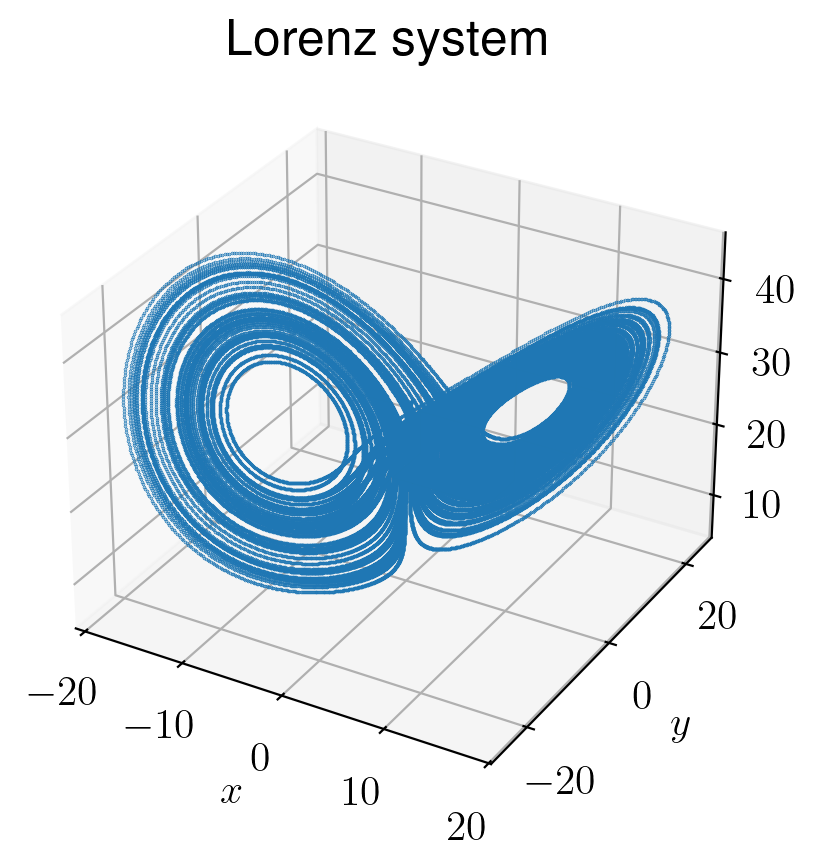

In [12]:
T = 100 
y0 = np.array([1.,-1.,30])
h = 1e-3
tRK4, yRK4 = integrate(RK4, lorenz_system, 0, T, y0, h)
# 3D plot
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.plot(yRK4[:,0],yRK4[:,1],yRK4[:,2],marker='.',linewidth=0.,markersize=0.5, color='C0')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')
ax.set_title(r'Lorenz system')
plt.show()